In [3]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../../DATA/penguins_size.csv')

In [5]:
df = df.dropna()

In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [8]:
y = df['species']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model_rfc = RandomForestClassifier(
    n_jobs=-1, 
    n_estimators=10, 
    max_features='sqrt',
    random_state=101,
)

In [13]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=101)

In [14]:
model_pred = model_rfc.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [16]:
confusion_matrix(y_test, model_pred)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

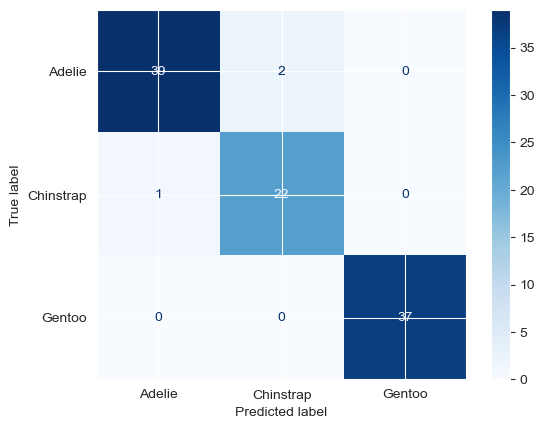

In [17]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, model_pred),
    display_labels=model_rfc.classes_).plot(cmap='Blues')

In [18]:
print(accuracy_score(y_test, model_pred))

0.9702970297029703


In [19]:
confusion_matrix(y_test, model_pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

In [20]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [21]:
feature_importance = model_rfc.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance * 100
})

features_df

,Feature,Importance
0,culmen_length_mm,31.867744
1,culmen_depth_mm,10.184870
2,flipper_length_mm,17.343398
3,body_mass_g,21.316964
4,island_Dream,14.512091
5,island_Torgersen,3.720114
6,sex_FEMALE,0.632264
7,sex_MALE,0.422556


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
test_error = []

for n in range(1, 60):
    model = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',
        n_jobs=-1,
    )
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    test_error.append(1 - scores.mean())
    
    # model.fit(X_train, y_train)
    # test_pred = model.predict(X_test)
    # test_error.append(1 - accuracy_score(y_test, test_pred))

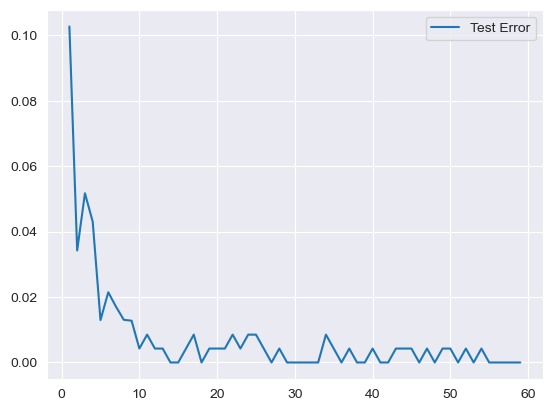

In [24]:
plt.plot(range(1, 60), test_error, label='Test Error')
plt.legend()

In [25]:
df = pd.read_csv('../../DATA/data_banknote_authentication.csv')

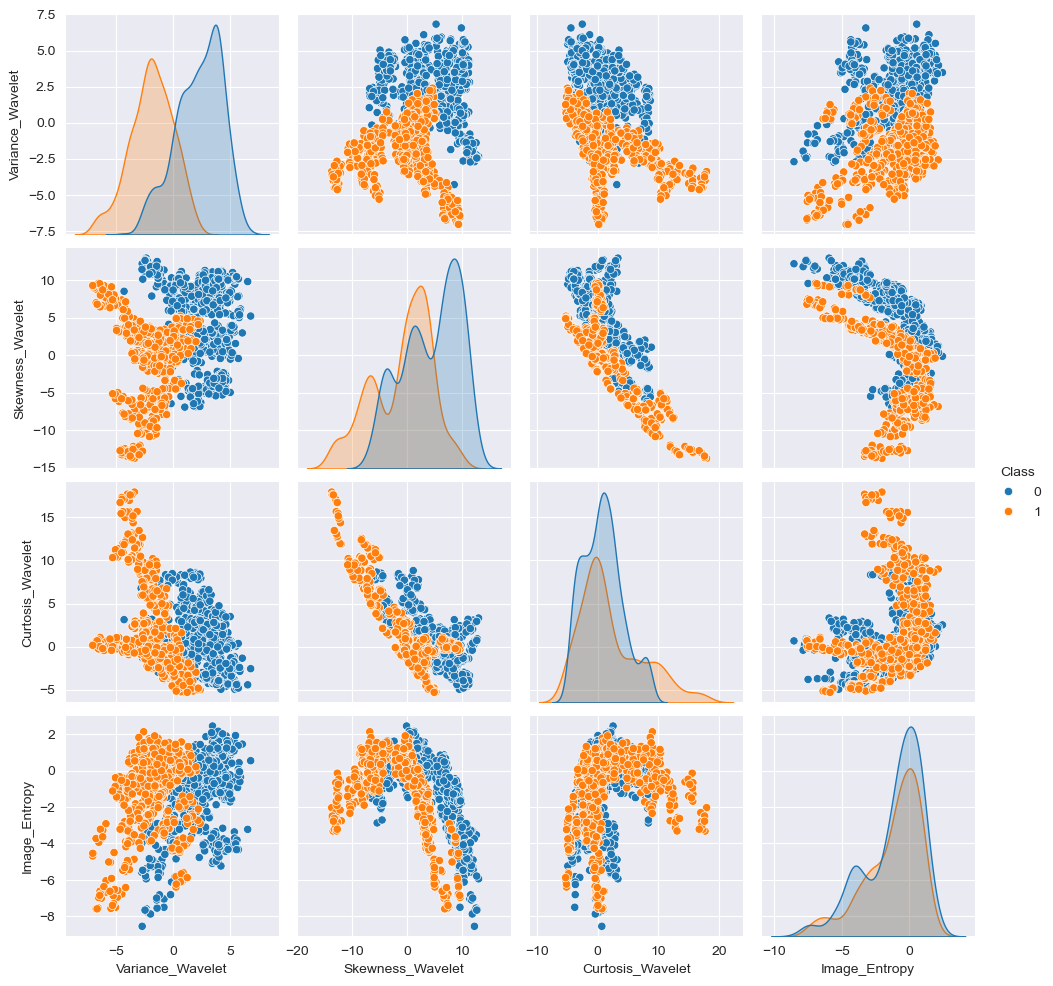

In [27]:
sns.pairplot(df, hue='Class')

In [28]:
X = df.drop('Class', axis=1)

In [29]:
y = df['Class']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [38]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
}

In [39]:
rfc = RandomForestClassifier(n_jobs=-1)
grid = GridSearchCV(rfc, param_grid, n_jobs=-1)

In [40]:
grid.fit(X_train, y_train)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\ens

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [41]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': False}

In [42]:
predictions = grid.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [46]:
accuracy_score(y_test, predictions)

0.9902912621359223

In [51]:
print(classification_report(y_test, predictions, target_names=['Real', 'Fake']))

              precision    recall  f1-score   support

        Real       1.00      0.98      0.99       124
        Fake       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [57]:
confusion_matrix(y_test, predictions)

array([[122,   2],
       [  0,  82]], dtype=int64)

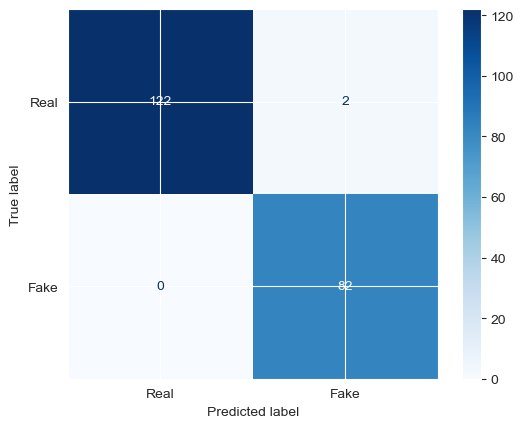

In [58]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions), display_labels=['Real', 'Fake']).plot(cmap='Blues')

In [61]:
from sklearn.metrics import accuracy_score

In [63]:
errors = []
misclassifications = []

for n in range(1, 64):
    rfc = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=2, n_jobs=-1)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

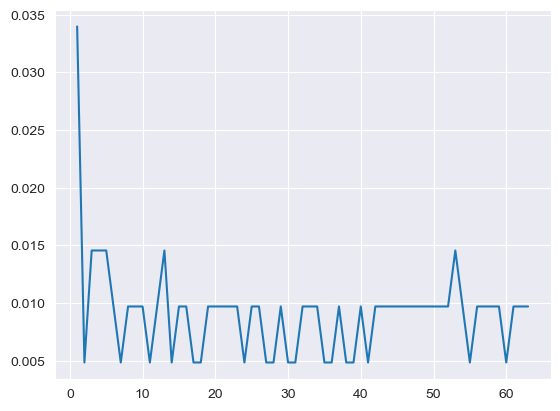

In [64]:
plt.plot(range(1, 64), errors)

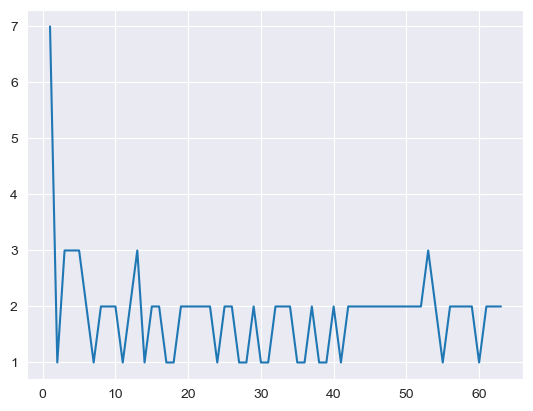

In [65]:
plt.plot(range(1, 64), misclassifications)